Analysis of the data from the first data collection for the ETS scale. 

In [1]:
import warnings
from pathlib import Path

import modeler
import numpy as np
import pandas as pd
import pingouin as pg
import preprocessor
import vizer

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
data_loc = Path.cwd().parent / "data"

# Show full dataframes when printing
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
np.set_printoptions(threshold=100, suppress=True)

# load raw data
df_raw = pd.read_excel(data_loc / "ets_data.xlsx")
df_raw.head()

,1 (AE8),2 (Cx11),3 (Sp4),4 (C7),5 (Cx6),6 (Ex6),7 (C5),8 (Ex3),9 (AE3),10 (C8),11 (Cx4),12 (Ex8),13 (TO8),14 (AE5),15 (TO3),16 (TO1),17 (C4),18 (Se2),19 (TO10),20 (Ex2),21 (Cx3),22 (TO4),23 (Se1),24 (T3),25 (TO11),26 (Cx8),27 (C10),28 (Ex1),29 (T2),30 (T1),31 (Cx7),32 (AE6),33 (Em3),34 (Em8),35 (C6),36 (C2),37 (TO7),38 (AE2),39 (TO6),40 (TO5),41 (AE7),42 (C9),43 (AE1),44 (EM1),45 (Ex7),46 (Sp3),47 (Sp1),48 (TO2),49 (AE9),50 (Em9),51 (Em6),52 (Sp6),53 (C1),54 (Sp5),55 (C14),56 (Cx9),57 (Em4),58 (Ex4),59 (AE4),60 (TO12),61 (Cx1),62 (Em7) .,63 (C13),64 (Cx5),65 (Sp2),66 (Cx2),67 (Cx12),68 (C12),69 (Em5),70 (TO9),71 (Ex5),72 (C3),73 (Cx10),74 (Em2),75 (C15),76 (C11),77(RS1),Age,Gender,Ethnicity
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5,2.00000,5,3,5
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5,3.00000,4,3,5
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4,1.00000,4,3,5
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,2.00000,5,3,3
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2,2.00000,3,3,5


In [3]:
# Clean up the column names
df_raw = preprocessor.clean_columns(df_raw)

# Start data cleaning
df = df_raw.copy()

# Reverse score the RS1 item - Note that I think this should be considered part of the connectedness question
# Formula for reverse scoring is: max_scale_value (6) + 1 - original_score
df["rs1_reversed"] = 6 + 1 - df["rs1"]

df.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,c8,cx4,ex8,to8,ae5,to3,to1,c4,se2,to10,ex2,cx3,to4,se1,t3,to11,cx8,c10,ex1,t2,t1,cx7,ae6,em3,em8,c6,c2,to7,ae2,to6,to5,ae7,c9,ae1,em1,ex7,sp3,sp1,to2,ae9,em9,em6,sp6,c1,sp5,c14,cx9,em4,ex4,ae4,to12,cx1,em7,c13,cx5,sp2,cx2,cx12,c12,em5,to9,ex5,c3,cx10,em2,c15,c11,rs1,age,gender,ethnicity,rs1_reversed
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5,2.00000,5,3,5,5.00000
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5,3.00000,4,3,5,4.00000
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4,1.00000,4,3,5,6.00000
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,2.00000,5,3,3,5.00000
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2,2.00000,3,3,5,5.00000


In [4]:
# Demographic cols
demo_cols = ["age", "gender", "ethnicity"]
# Get list of the scale columns - also remove rs1 before reverse scoring
scale_cols = [col for col in df.columns if col not in demo_cols and col != "rs1"]
# List of scale columns w/o the reverse coded item
scale_cols_no_rs1 = [col for col in scale_cols if col != "rs1_reversed"]

In [5]:
# Create total scores
df["ets_total"] = df[scale_cols].sum(axis=1)
df["ets_total_no_rs1"] = df[scale_cols_no_rs1].sum(axis=1)

## Correlation matrix

In [6]:
vizer.corr_matrix(df=df, cols=[col for col in df.columns if col not in demo_cols])

Note that once we have narrowed down our scale items more, we will want to use corrected inter-scale correlations. This re-calculates the total removing the each comparison variable. For example, with ae8, we would calculate the scale total without that item, and then get the correlation between ae8 and the rest of the scale, not including itself. That's a bit messy to do in code here and won't make much difference at all when we have this many items though, so we will reserve that for later. 

### Observations

- Inter-item correlations: Ideally these fall between 0.3 and 0.7. Not so low that it indicates the item is not measuring the same general construct as the others, and not so high that the item is redundant. 
    - I wouldn't remove any items immediately due to redundancy (very high correlations). 
    - We do have some items where almost all of the inter-item correlations are quite low. We should consider removing these items, but can figure this out as we do the EFA. 
        - ex6, se2, t3, c10, ex1, t2, c1, c14, c13, c12, and c3
- Item-total correlations: All items had at moderate to high correlations with the total scale, but not so high as to indicate redundancy. An exception to this is our reverse scored item. As expected, the items I'm suggesting we consider removing due to the inter-item correlations had also had the lowest item-total correlations. 

I don't think our reverse scored item is acting as we hoped. The correlations are very low with all individual items. This is a good indication that people weren't interpreting the question correctly. If they were, I'd expect it to at least have moderate correlations with the connection related items. I can think of a few reasons as to why this happened, but for now we should remove the item from any factor analysis. We will need to figure out how to discuss it in the paper. I think we can generally justify the exclusion of reverse scored items, as the practice of including them seems to have become less common. I found sources related to reasons to exclude them if needed. 

Before jumping into our Factor Analysis, lets get some reliability calculations out of the way. 

## Reliability Analysis/Internal Consistency.
If items are measuring the same latent variable, they should be strongly correlated. The most common way to measure reliability/internal consistency is Coefficient Alpha (aka Cronbach's Alpha). 

In [7]:
print(
    "Cronbach's Alpha on all items (except the reverse scored item): ",
    pg.cronbach_alpha(df[scale_cols_no_rs1]),
)

Cronbach's Alpha on all items (except the reverse scored item):  (np.float64(0.9761929849678292), array([0.973, 0.979]))


This is excellent. A Cronbach's Alpha above 0.9 indicates excellent internal consistency. 

The first number above indicates the Cronbach's Alpha number, and the numbers in [] are the confidence interval. 

## Factor Analysis
Next we will move onto the Exploratory Factor Analysis (common factors). 

We need to do the following:
- Determine how many factors/components we have and want to keep. A mix of science and art here!
- Start to reduce the items in the scale as possible. 

We will use an EFA, with an oblique rotation since we have theoretically correlated factors. 

Since all of our items are on the same 6 point likert scale, there is no need to standardize them before running the Factor Analysis. 

In [8]:
df_efa = df[scale_cols_no_rs1].copy()

df_efa.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,c8,cx4,ex8,to8,ae5,to3,to1,c4,se2,to10,ex2,cx3,to4,se1,t3,to11,cx8,c10,ex1,t2,t1,cx7,ae6,em3,em8,c6,c2,to7,ae2,to6,to5,ae7,c9,ae1,em1,ex7,sp3,sp1,to2,ae9,em9,em6,sp6,c1,sp5,c14,cx9,em4,ex4,ae4,to12,cx1,em7,c13,cx5,sp2,cx2,cx12,c12,em5,to9,ex5,c3,cx10,em2,c15,c11
0,5,4,4,3,5,3,3,4,4,4,4,3,3,4,4,4,4,4,4,4,4,4,4,3,4,3,5,3,3,4,4,4,4,3,3,3,4,4,5,5,3,5,5,5,5,3,5,5,4,3,3,4,3,4,4,4,3,4,3,3,4,4,2,4,5,4,5,4,4,4,4,4,4,3,4,5
1,5,4,3,3,4,2,2,3,3,3,4,3,3,3,4,3,3,4,3,4,2,4,3,5,4,2,5,2,5,4,2,3,3,3,3,4,3,4,3,4,2,4,4,5,5,3,3,4,4,4,4,3,2,2,4,2,4,5,4,2,2,4,4,2,3,3,3,5,3,3,4,4,3,4,3,5
2,3,3,2,3,3,2,3,2,3,4,2,3,2,1,3,3,3,3,3,1,1,2,1,1,2,1,2,5,3,1,3,2,2,4,4,3,3,2,3,3,2,3,4,3,4,1,3,4,2,1,1,3,3,3,2,2,1,4,1,3,2,1,1,1,1,1,2,2,2,2,1,3,2,1,3,4
3,5,5,5,5,5,5,5,5,6,5,5,5,4,5,5,5,5,3,5,5,5,5,4,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5
4,1,2,3,6,3,2,3,4,4,2,3,3,3,3,3,4,3,2,3,3,4,2,3,2,3,3,2,3,2,2,2,3,3,1,4,3,3,5,3,3,3,2,4,3,1,2,4,4,3,2,3,3,3,3,2,4,3,3,4,2,3,1,2,4,3,3,2,2,3,3,3,3,4,2,2,2


First - How many factors?

In [9]:
efa_model = modeler.efa(
    df_efa
)  # Note that we are using the maximum-likelihood method for fitting

# Not using the reverse scored item
# Check Eigenvalues
_, common_factors_ev = efa_model.get_eigenvalues()

print(common_factors_ev)

[27.60401749  2.67790572  2.04002277  1.12731257  1.03179997  0.71354425
  0.58766662  0.58282207  0.49954407  0.45375107  0.40466508  0.3738082
  0.33347466  0.2772281   0.25852237  0.2245329   0.20273721  0.17669781
  0.15241393  0.13779813  0.13073044  0.09665943  0.0891783   0.0609091
  0.04039156  0.01580263  0.00253553 -0.01040264 -0.03305678 -0.04209285
 -0.0670739  -0.09045543 -0.10554201 -0.12161963 -0.12323782 -0.13099983
 -0.13889326 -0.15302014 -0.16860469 -0.18671617 -0.2030357  -0.21702676
 -0.22536126 -0.23847033 -0.24908487 -0.2608454  -0.27559676 -0.28154779
 -0.29050088 -0.29935992 -0.31245639 -0.32928969 -0.33411535 -0.33801138
 -0.3568247  -0.36459344 -0.36914172 -0.3803235  -0.3881287  -0.39794877
 -0.40364285 -0.42164836 -0.42689673 -0.43627402 -0.44174481 -0.45029428
 -0.46243378 -0.46766725 -0.48072759 -0.48845022 -0.4961135  -0.50163225
 -0.52304967 -0.53682194 -0.55784505 -0.59401551]


The output above is a sorted array of the eigenvalues. 

Using the Kaiser-Guttman Criterion for retaining factors would mean keeping any with an eigenvalue above 1. Based on that we would have 5 factors, but one of those is very close to 1. This method isn't commonly used because of situations like this where values are near the cutoff, often resulting in more factors than really make sense. 

A more common method is the scree test, where we look at a graph of the eigenvalues and see were we have a drop off point where more factors aren't adding much info. Below is our scree plot. 

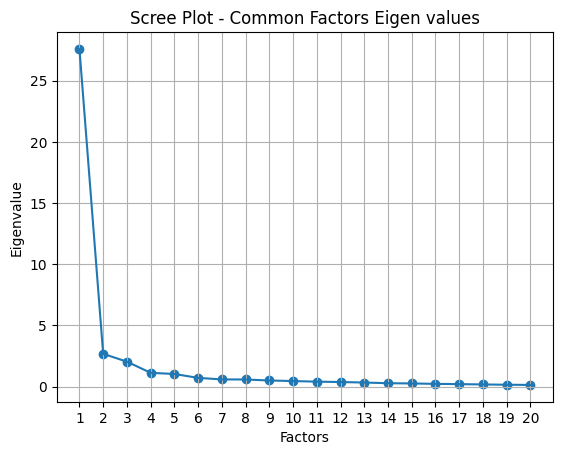

In [10]:
vizer.scree_plot(common_factors_ev, max_viz=20)

This is somewhat helpful, but choosing the number of factors is pretty hard and different folks will give different answers. An argument could be made for only 1 factor here. You could also argue that there is an "elbow" at 4, indicating we should choose 3 factors. Or maybe even an elbow at 6 and choose 5. How we choose here should include looking at what scale items would fall in each factor if we tried 3 or 5 factors. 

Another option is to use parallel analysis, which I'll try next. 

In [11]:
# modeler.parallel_analysis(
#     df_efa, K=50, print_eigenvalues=True, show_scree_plot=True, max_scree_factors=20
# )

Our parallel analysis suggests 5 factors. 5 is still very close to the factors on random data, so we may choose fewer.

Next, we will re-run the factor analysis with a fixed number of factors, and examine the factor loadings. We will run for 1, 2, 3, 4, and 5 factor solutions. 

Getting factor solution for 1 factors.



c:\Users\renee\envs\scaledev\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Factor loadings for a 1 factor solution:


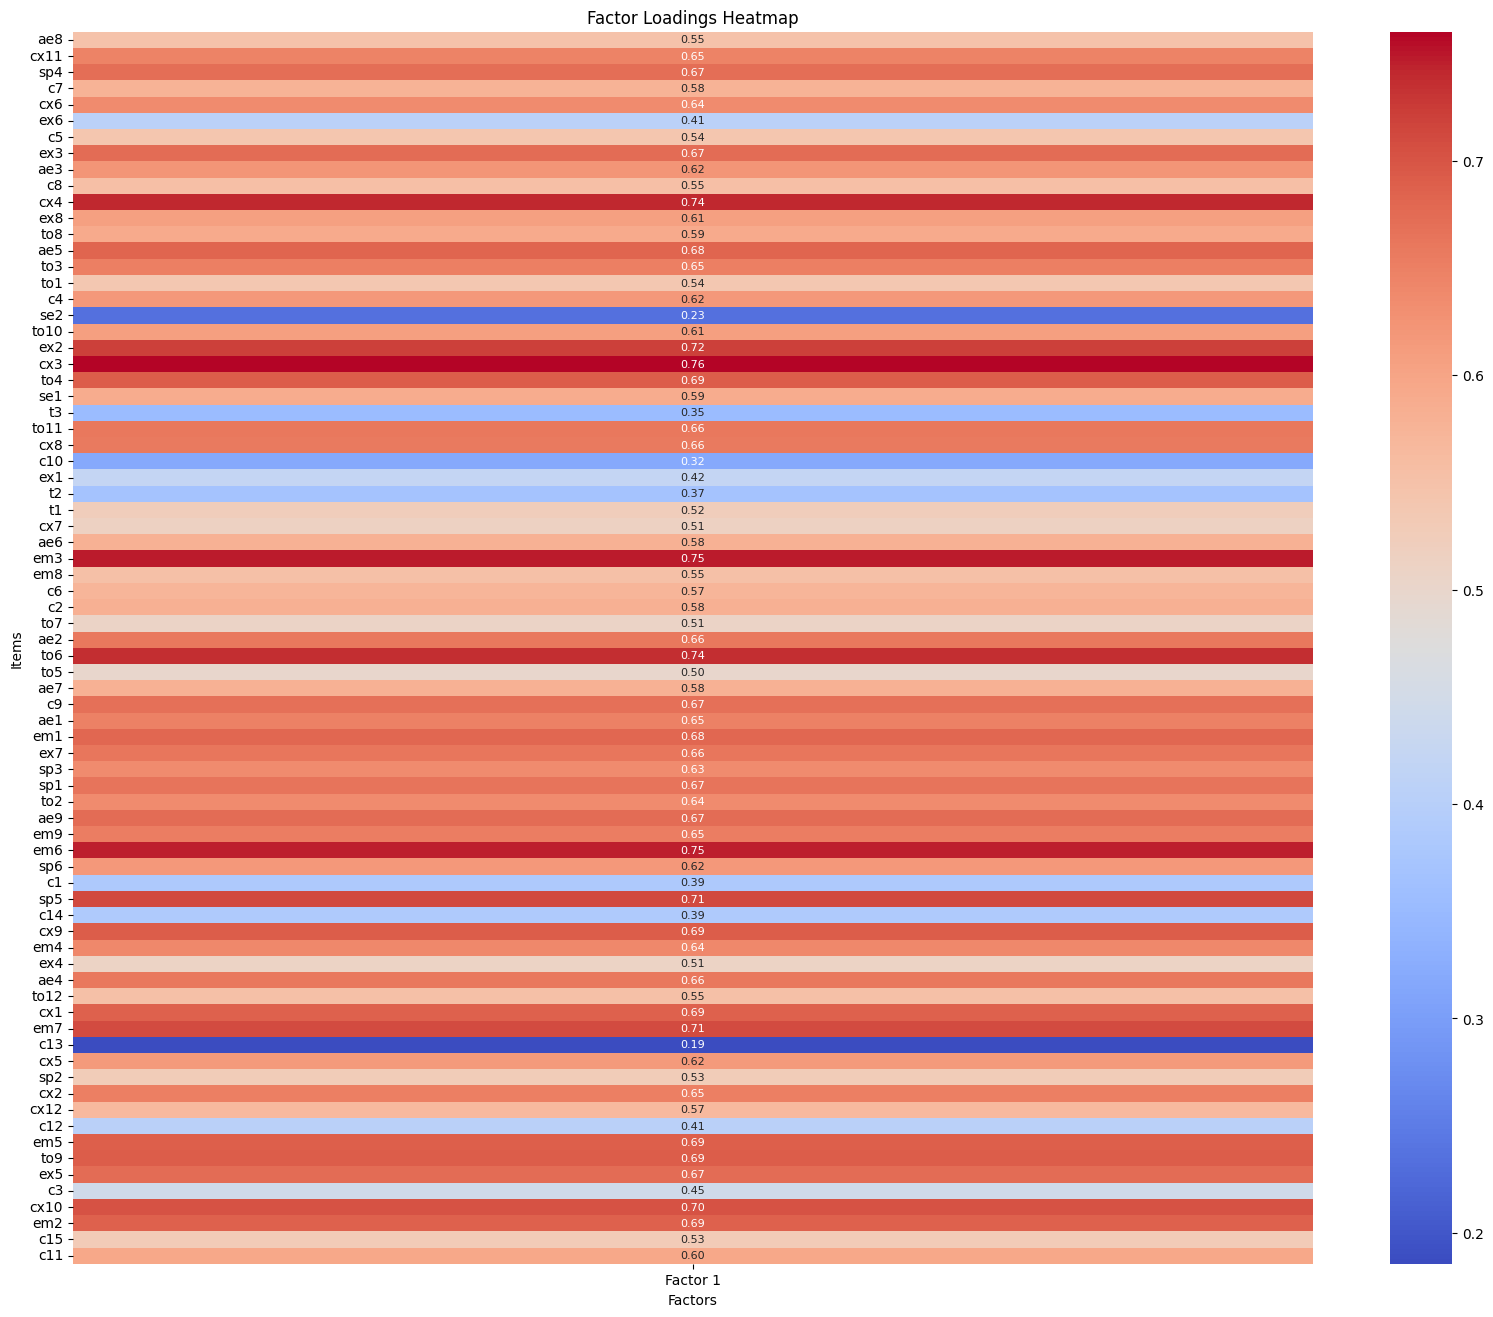

Getting factor solution for 2 factors.

Factor loadings for a 2 factor solution:


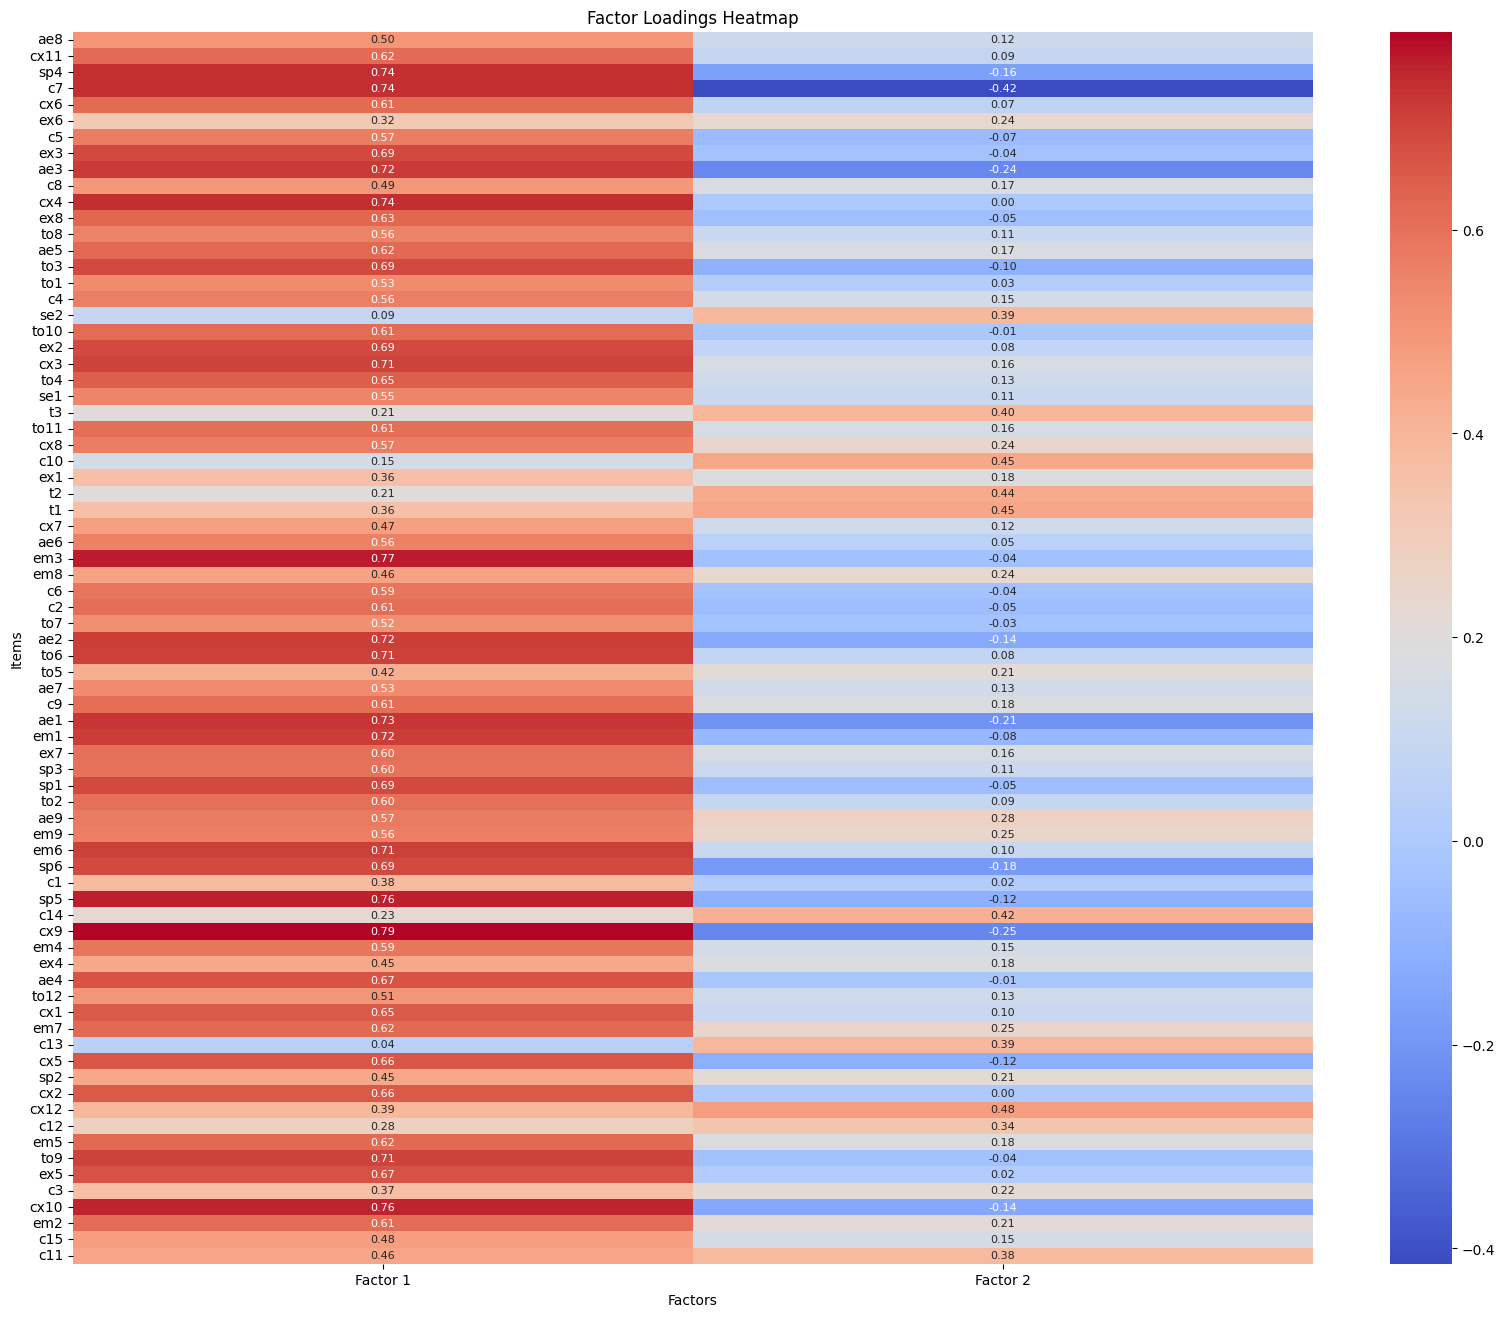

Getting factor solution for 3 factors.

Factor loadings for a 3 factor solution:


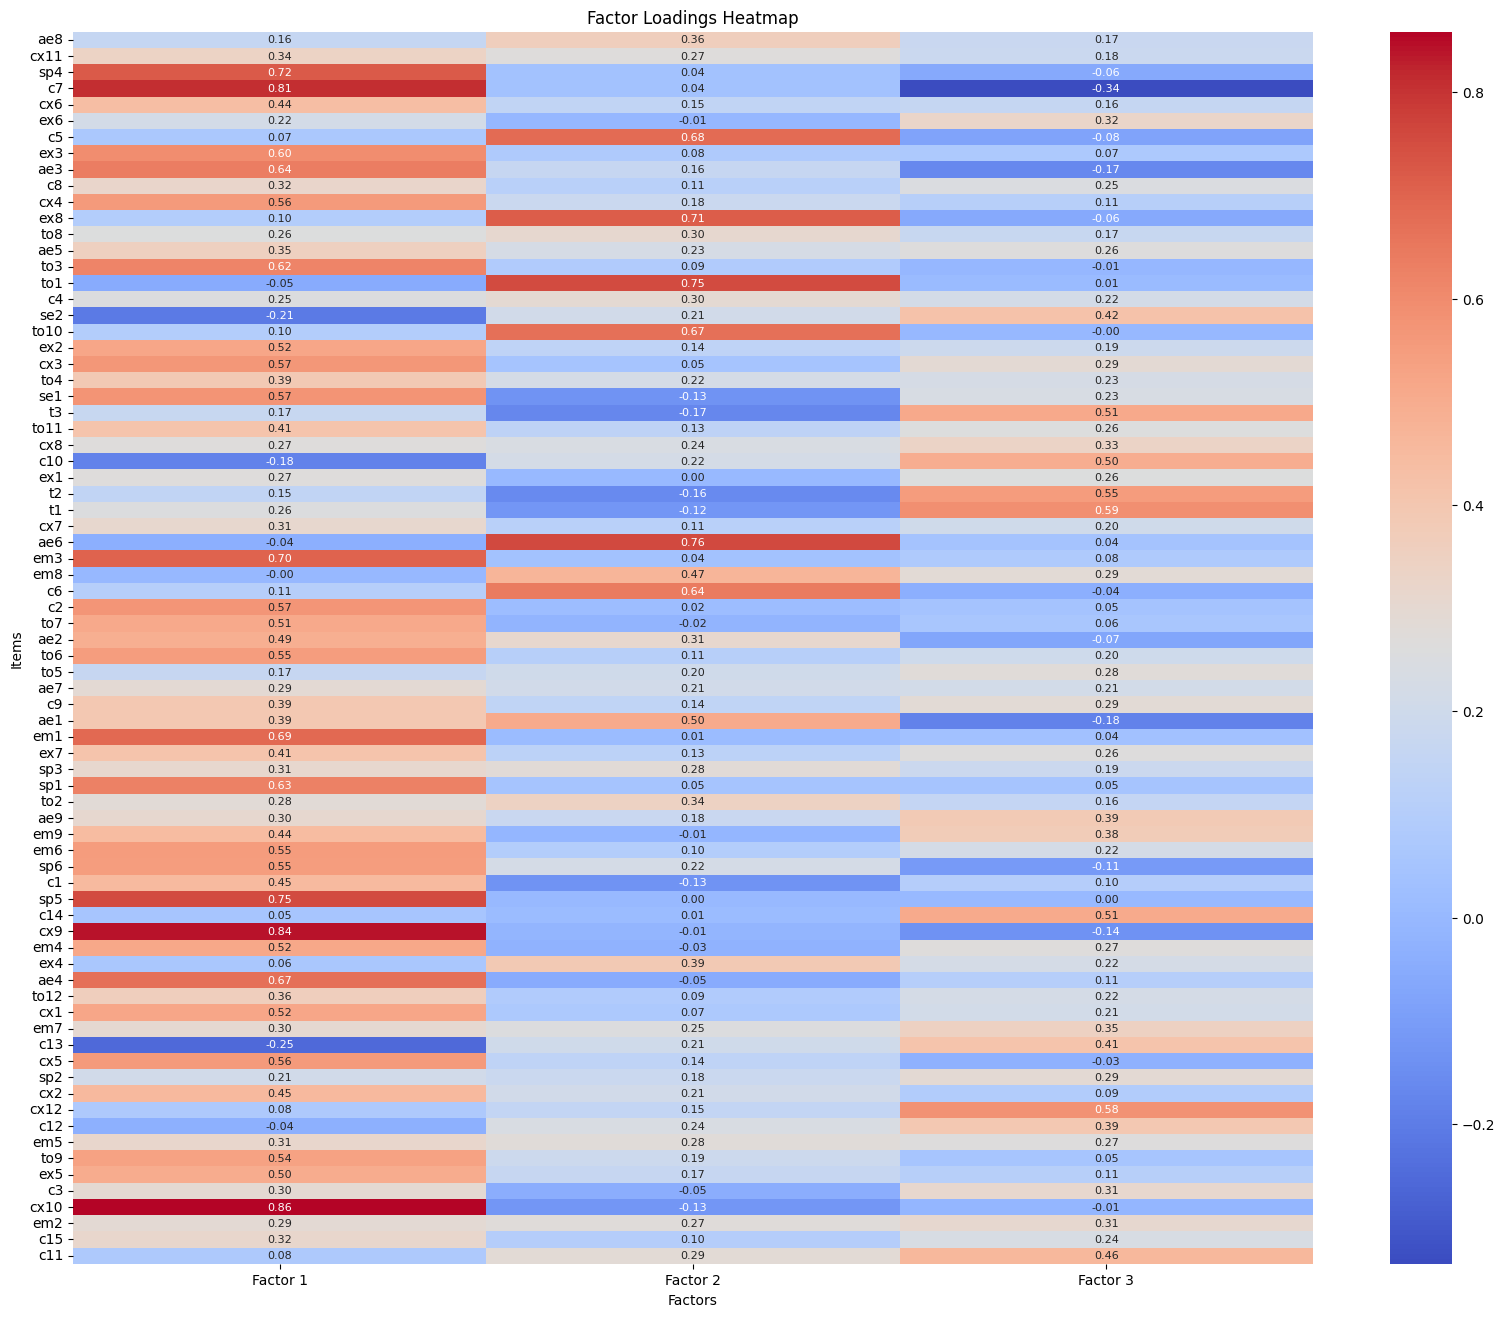

Getting factor solution for 4 factors.

Factor loadings for a 4 factor solution:


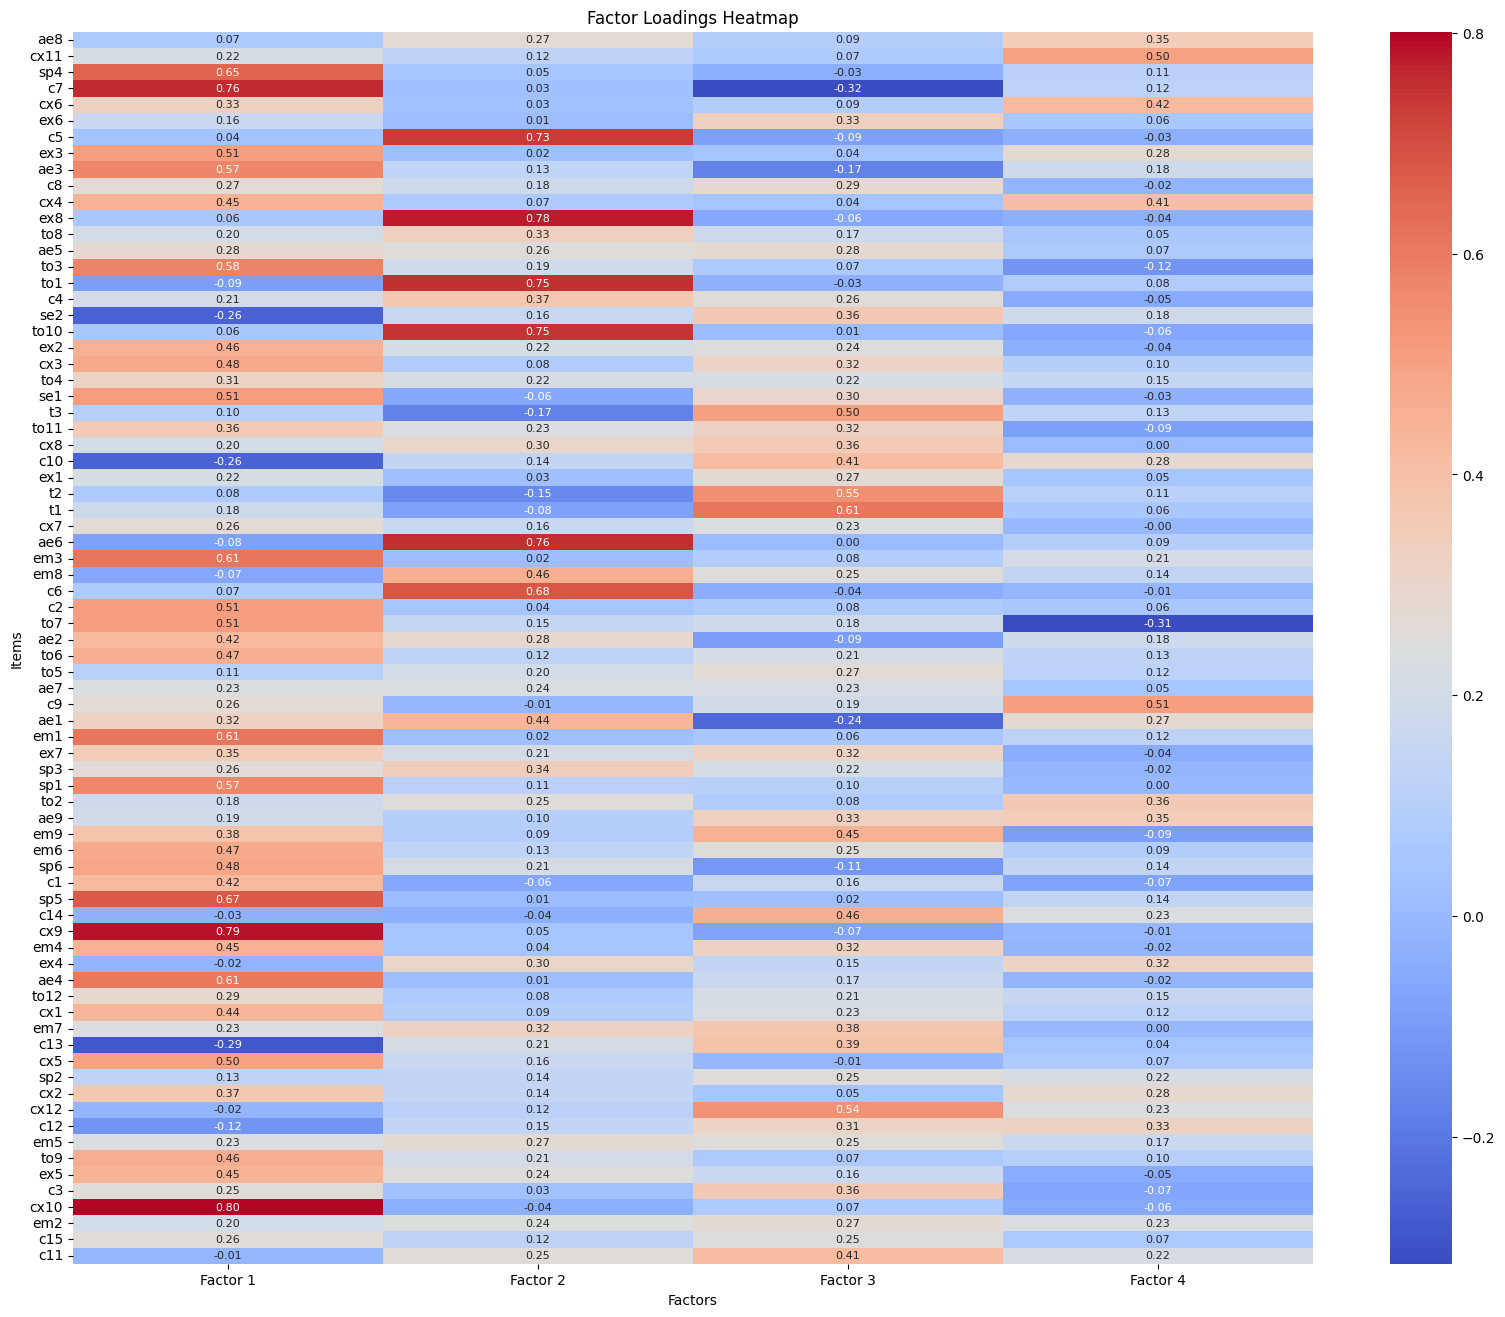

Getting factor solution for 5 factors.

Factor loadings for a 5 factor solution:


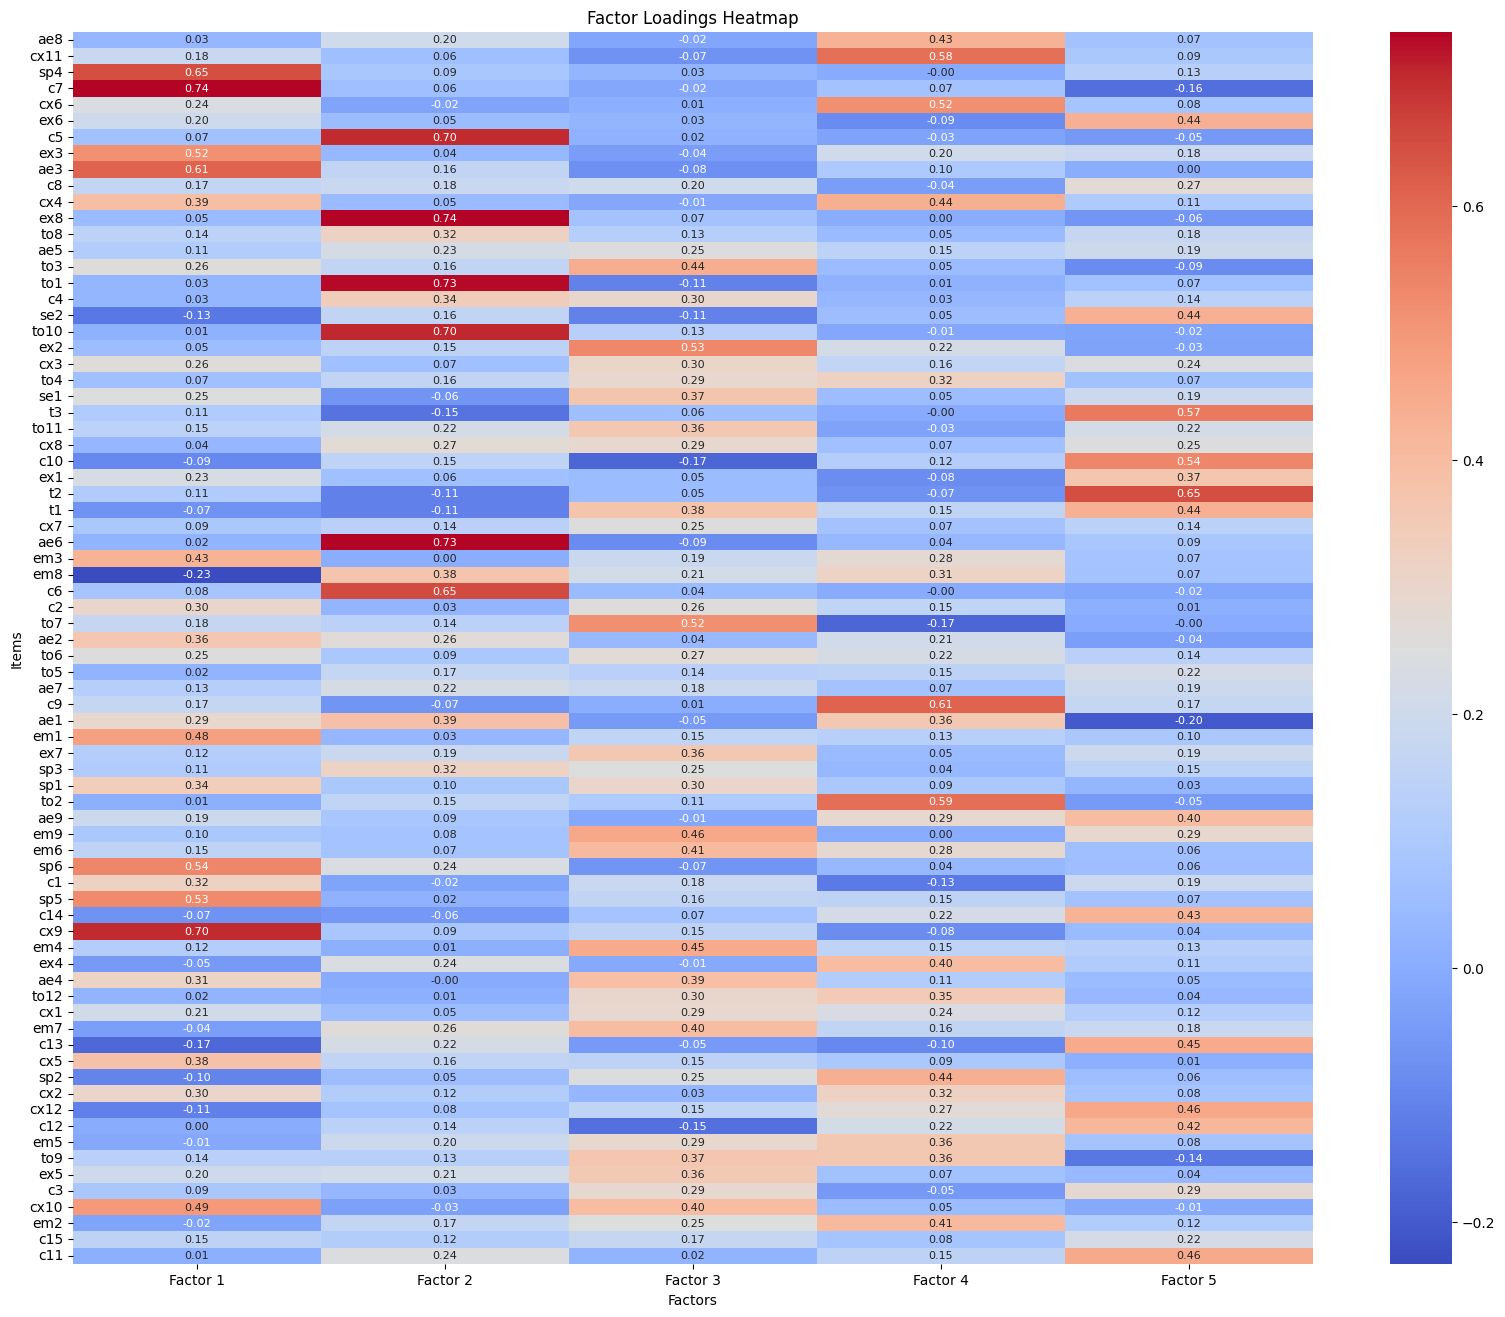

In [12]:
fa_results = {}
for f in range(1, 6):
    print(f"Getting factor solution for {f} factors.\n")
    f_factor_results = {}
    fixed_efa = modeler.efa(df=df_efa, n_factors=f)

    print(f"Factor loadings for a {f} factor solution:")

    # add results to fa_results for exploring later
    fa_results[f] = {
        "model": fixed_efa,
        "loadings": fixed_efa.loadings_,
        "item_names": df_efa.columns,
    }

    vizer.plot_loadings_heatmap(
        loadings=fixed_efa.loadings_,
        item_names=df_efa.columns,
        factor_names=[f"Factor {i+1}" for i in range(fixed_efa.n_factors)],
    )

Ok, so we still have a lot of features, which makes the task of looking at them to decide on the number of factors to use a bit of a task. Lets look at what items have consistently low loadings and start removing those. 

In [13]:
for factors, results in fa_results.items():
    print(f"Items with low loadings for the {factors} factor solution: ")
    low_loadings = modeler.get_items_with_low_loadings(
        results["loadings"], results["item_names"], threshold=0.4
    )
    low_loadings.sort()
    results["low_loadings"] = low_loadings
    print(low_loadings)
    print("Number of items with low loadings on all factors: ", len(low_loadings))
    print()

Items with low loadings for the 1 factor solution: 
['c1', 'c10', 'c13', 'c14', 'se2', 't2', 't3']
Number of items with low loadings on all factors:  7

Items with low loadings for the 2 factor solution: 
['c1', 'c12', 'c13', 'c3', 'ex1', 'ex6', 'se2', 't3']
Number of items with low loadings on all factors:  8

Items with low loadings for the 3 factor solution: 
['ae5', 'ae7', 'ae8', 'ae9', 'c12', 'c15', 'c3', 'c4', 'c8', 'c9', 'cx11', 'cx7', 'cx8', 'em2', 'em5', 'em7', 'ex1', 'ex4', 'ex6', 'sp2', 'sp3', 'to12', 'to2', 'to4', 'to5', 'to8']
Number of items with low loadings on all factors:  26

Items with low loadings for the 4 factor solution: 
['ae5', 'ae7', 'ae8', 'ae9', 'c12', 'c13', 'c15', 'c3', 'c4', 'c8', 'cx2', 'cx7', 'cx8', 'em2', 'em5', 'em7', 'ex1', 'ex4', 'ex6', 'ex7', 'se2', 'sp2', 'sp3', 'to11', 'to12', 'to2', 'to4', 'to5', 'to8']
Number of items with low loadings on all factors:  29

Items with low loadings for the 5 factor solution: 
['ae1', 'ae2', 'ae4', 'ae5', 'ae7', '

# Explore 5 factor solution

In [ ]:
# Remove the items with low loadings from the 5 factor solution
df_5_factor = df_efa.drop(columns=fa_results[5]["low_loadings"])

# Sample of the data with the remaining items
df_5_factor.head()

,ae8,cx11,sp4,c7,cx6,ex6,c5,ex3,ae3,cx4,ex8,to3,to1,se2,to10,ex2,t3,c10,t2,t1,ae6,em3,c6,to7,c9,em1,to2,em9,em6,sp6,sp5,c14,cx9,em4,em7,c13,sp2,cx12,c12,cx10,em2,c11
0,5,4,4,3,5,3,3,4,4,4,3,4,4,4,4,4,3,5,3,4,4,4,3,4,5,5,5,3,3,4,4,4,4,3,4,2,5,5,4,4,3,5
1,5,4,3,3,4,2,2,3,3,4,3,4,3,4,3,4,5,5,5,4,3,3,3,3,4,5,4,4,4,3,2,4,2,4,4,4,3,3,5,3,4,5
2,3,3,2,3,3,2,3,2,3,2,3,3,3,3,3,1,1,2,3,1,2,2,4,3,3,3,4,1,1,3,3,2,2,1,1,1,1,2,2,2,1,4
3,5,5,5,5,5,5,5,5,6,5,5,5,5,3,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,5,5,1,5,5,5,5,5,5
4,1,2,3,6,3,2,3,4,4,3,3,3,4,2,3,3,2,2,2,2,3,3,4,3,2,3,4,2,3,3,3,2,4,3,1,2,3,2,2,4,2,2


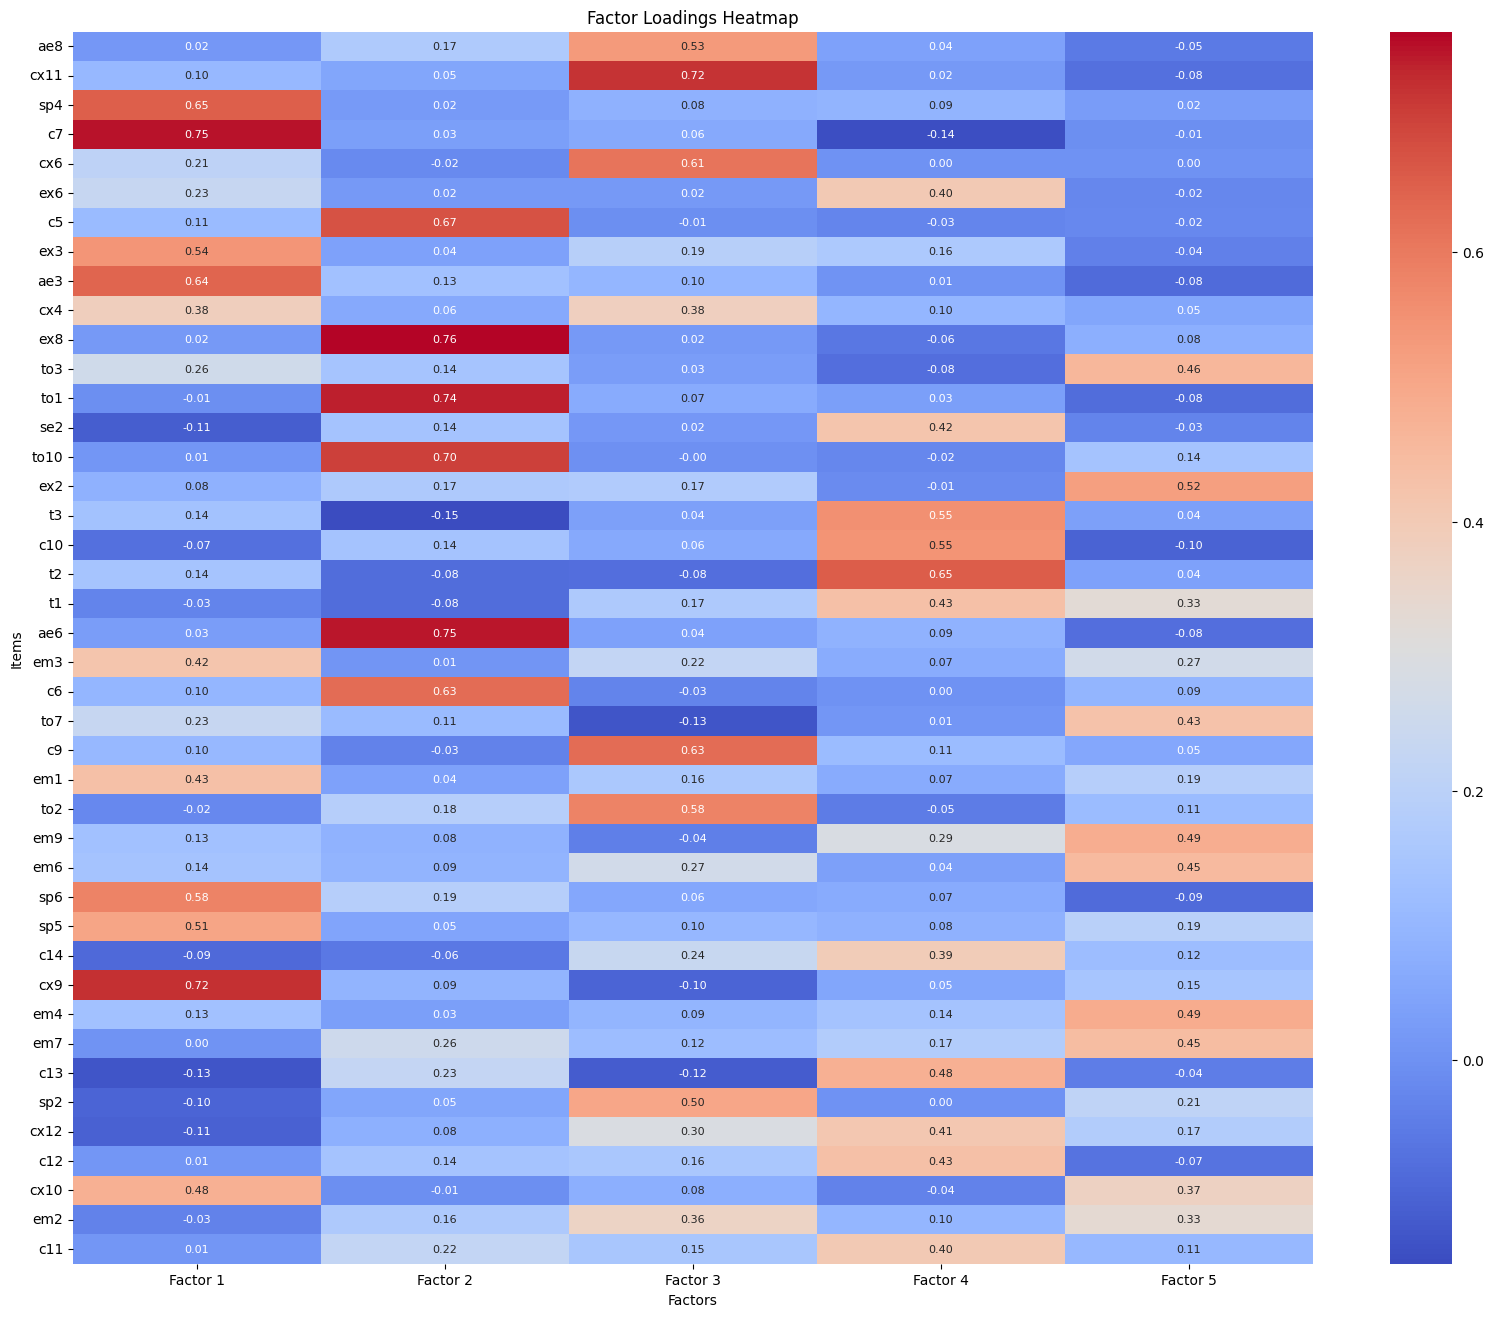

In [15]:
# re-run with 5 factors on the reduced dataset
reduced_items_efa_v1 = modeler.efa(df=df_5_factor, n_factors=5)

vizer.plot_loadings_heatmap(
    loadings=reduced_items_efa_v1.loadings_,
    item_names=df_5_factor.columns,
    factor_names=[f"Factor {i+1}" for i in range(reduced_items_efa_v1.n_factors)],
)

In [16]:
# Items with low loadings on all factors:
low_loadings = modeler.get_items_with_low_loadings(
    reduced_items_efa_v1.loadings_, df_5_factor.columns, threshold=0.4
)
low_loadings.sort()

print(low_loadings)

['c14', 'cx4', 'em2']


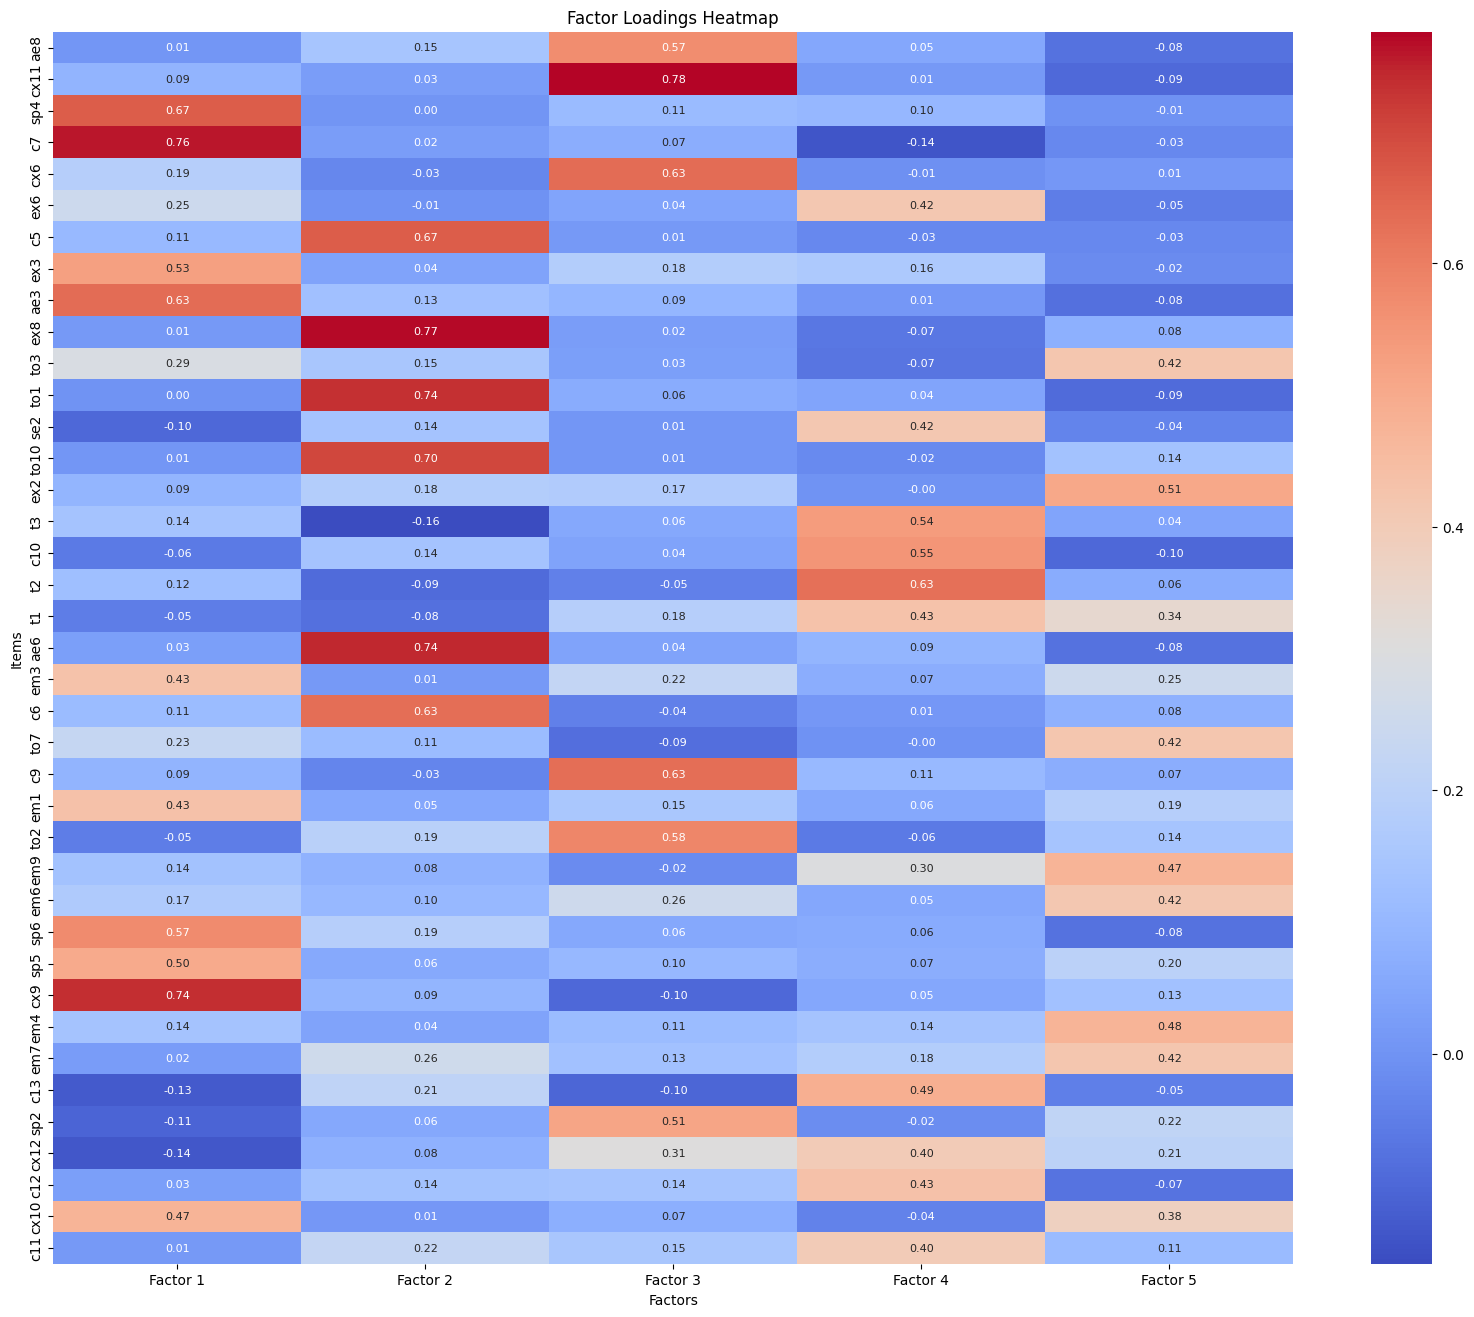

In [17]:
# Run again removing these items
df_5_factor_v2 = df_5_factor.drop(columns=low_loadings)
reduced_items_efa_v2 = modeler.efa(df=df_5_factor_v2, n_factors=5)

vizer.plot_loadings_heatmap(
    loadings=reduced_items_efa_v2.loadings_,
    item_names=df_5_factor_v2.columns,
    factor_names=[f"Factor {i+1}" for i in range(reduced_items_efa_v2.n_factors)],
)

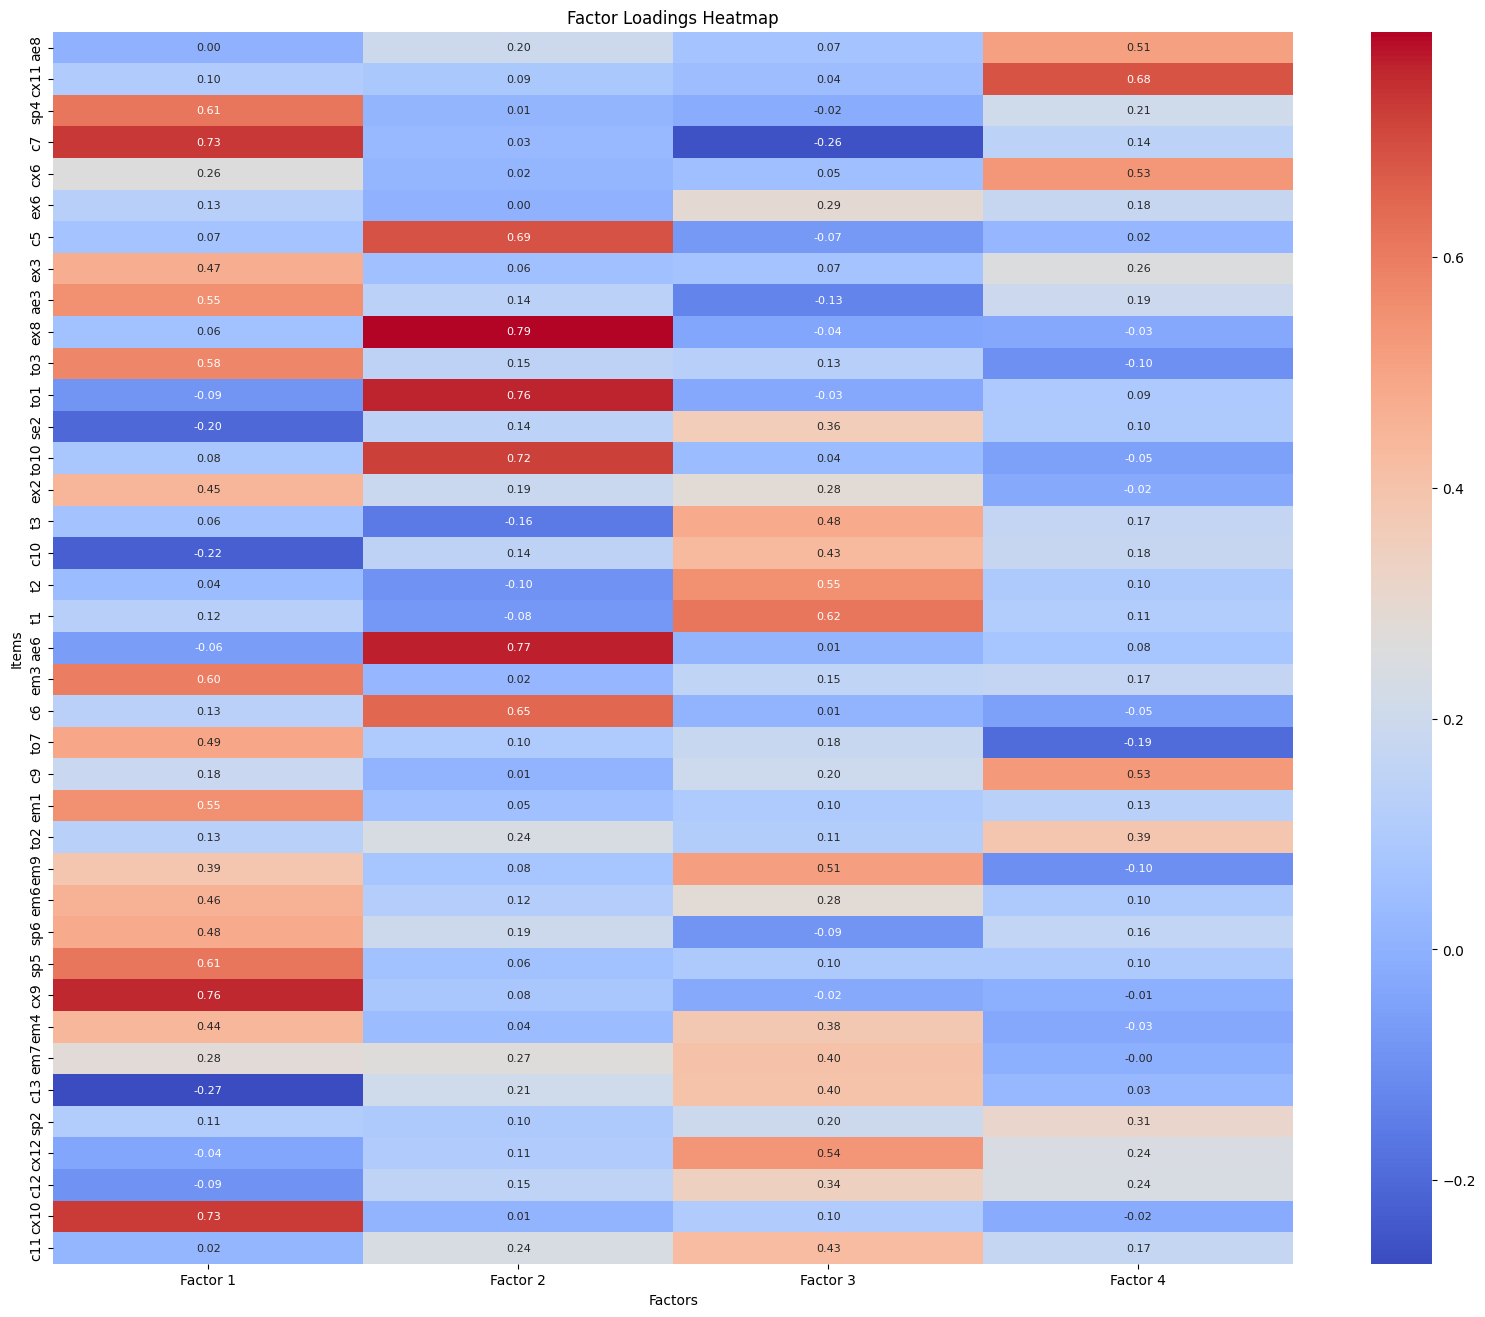

In [18]:
# Lets try a 4 factor solution
# Run again removing these items
df_4_factor = df_5_factor_v2.copy()
efa_4_factor = modeler.efa(df=df_4_factor, n_factors=4)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor.loadings_,
    item_names=df_4_factor.columns,
    factor_names=[f"Factor {i+1}" for i in range(efa_4_factor.n_factors)],
)

After dropping items, I do like how the 4 factor solution is looking better. 
Let's do one more round dropping any items where loadings on all items is < 0.4.

In [19]:
low_loadings = modeler.get_items_with_low_loadings(
    efa_4_factor.loadings_, df_4_factor.columns, threshold=0.4
)
low_loadings.sort()

print(low_loadings)

['c12', 'ex6', 'se2', 'sp2', 'to2']


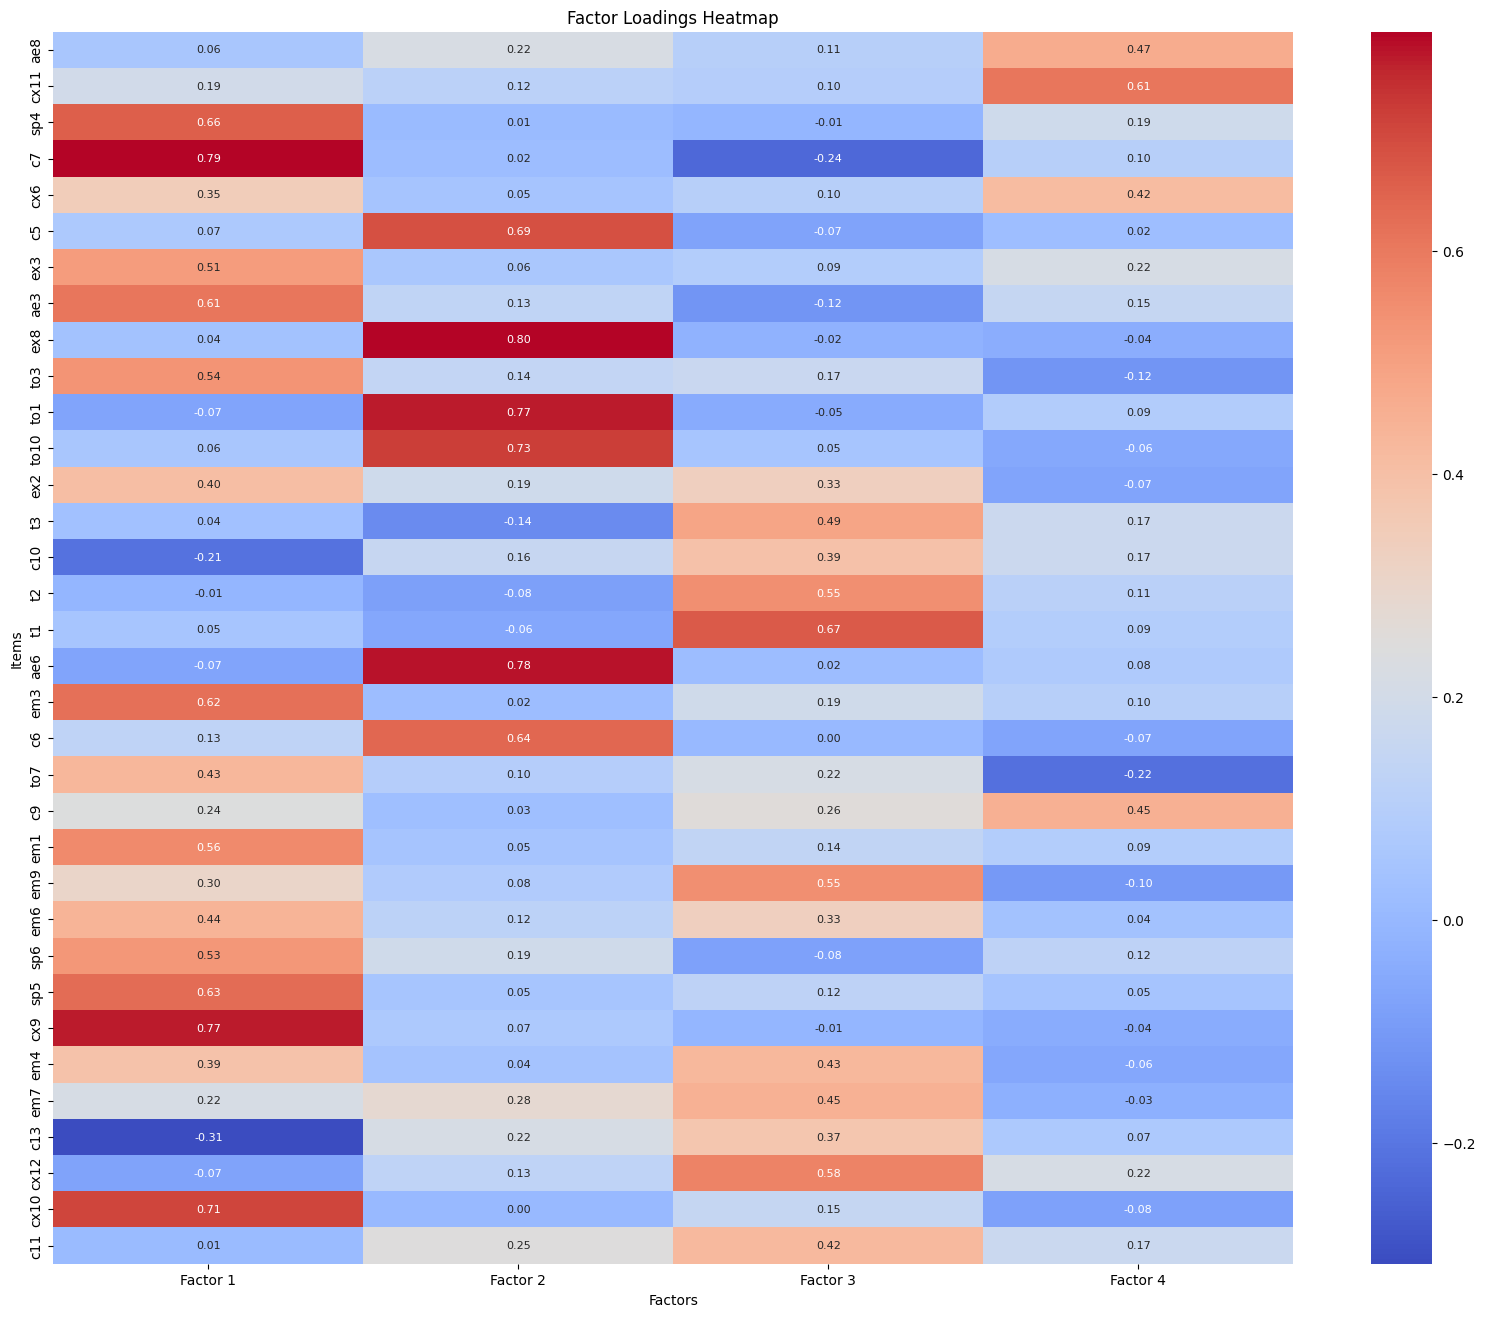

In [20]:
df_4_factor_v2 = df_4_factor.drop(columns=low_loadings)

efa_4_factor_v2 = modeler.efa(df=df_4_factor_v2, n_factors=4)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor_v2.loadings_,
    item_names=df_4_factor_v2.columns,
    factor_names=[f"Factor {i+1}" for i in range(efa_4_factor_v2.n_factors)],
)

In [21]:
# Another round
low_loadings = modeler.get_items_with_low_loadings(
    efa_4_factor_v2.loadings_, df_4_factor_v2.columns, threshold=0.4
)
low_loadings.sort()

print(low_loadings)

['c10', 'c13']


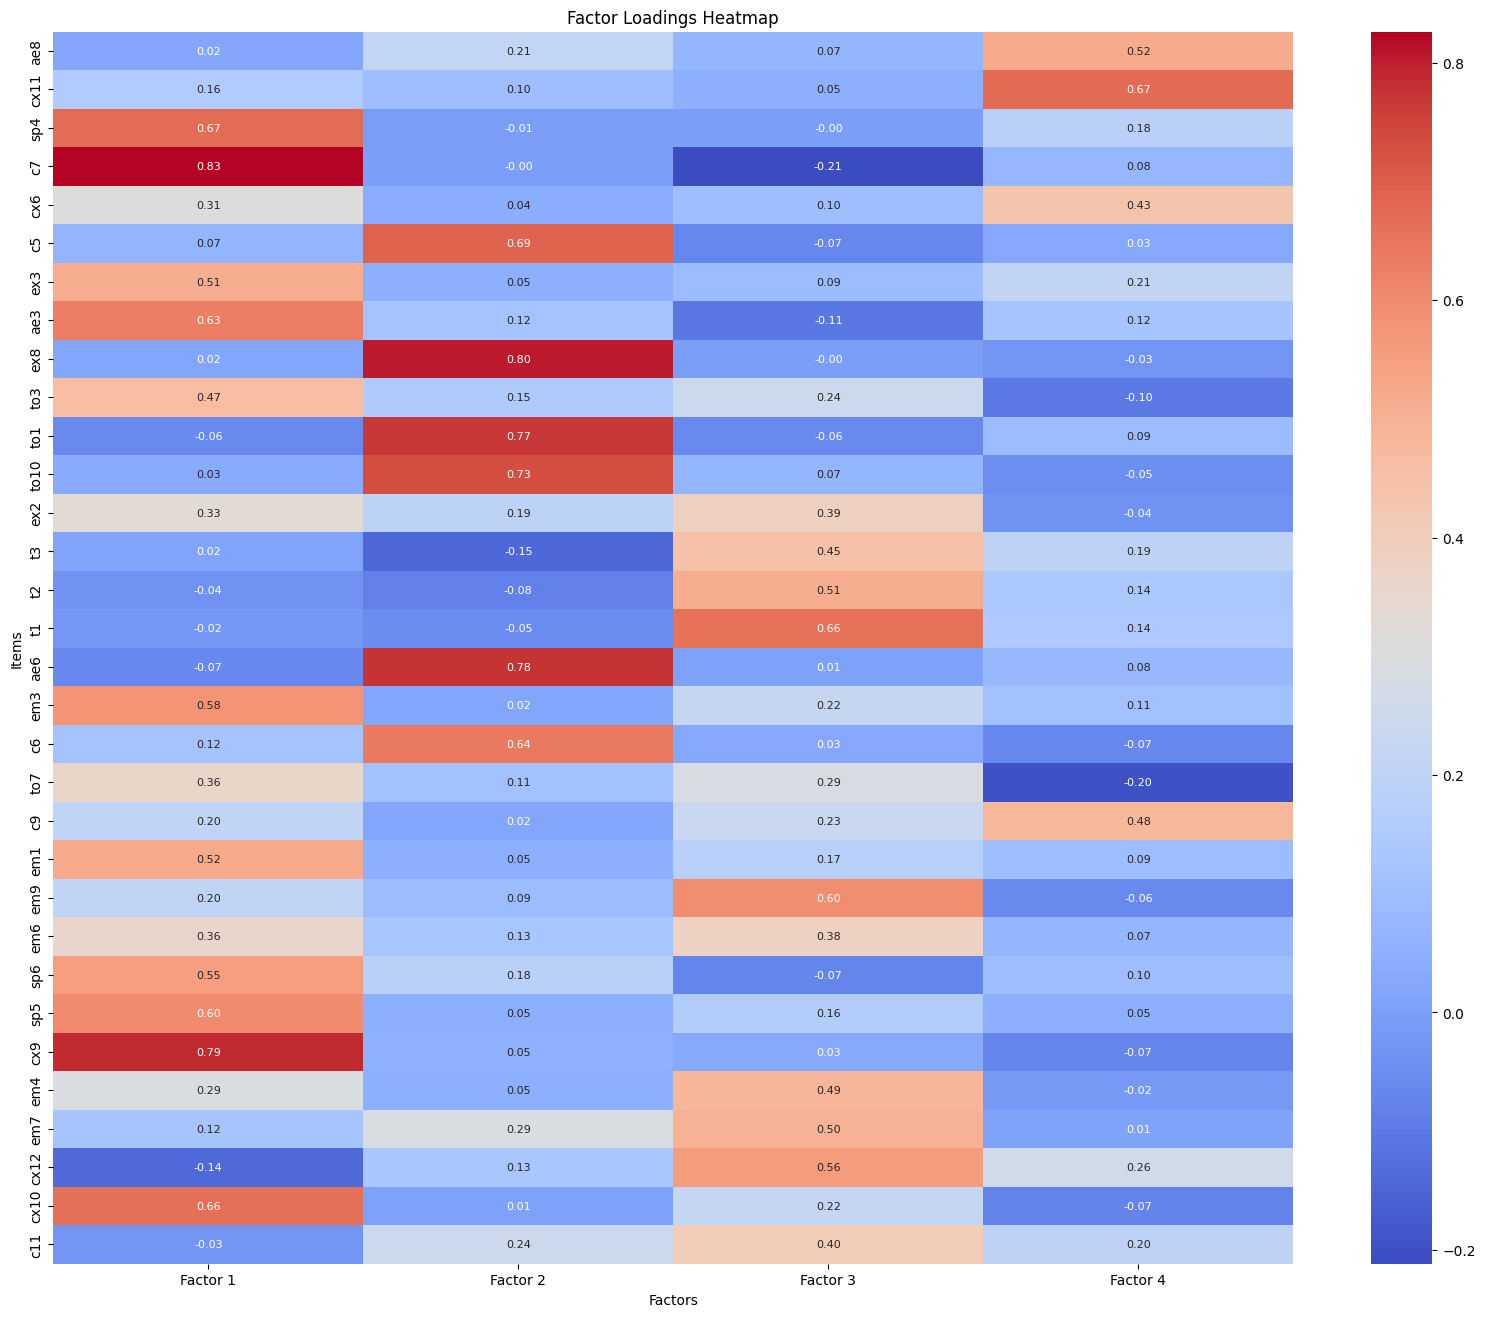

In [22]:
df_4_factor_v3 = df_4_factor_v2.drop(columns=low_loadings)

efa_4_factor_v3 = modeler.efa(df=df_4_factor_v3, n_factors=4)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor_v3.loadings_,
    item_names=df_4_factor_v3.columns,
    factor_names=[f"Factor {i+1}" for i in range(efa_4_factor_v3.n_factors)],
)

In [23]:
low_loadings = modeler.get_items_with_low_loadings(
    efa_4_factor_v3.loadings_, df_4_factor_v3.columns, threshold=0.4
)
low_loadings.sort()

print(low_loadings)

['em6', 'ex2', 'to7']


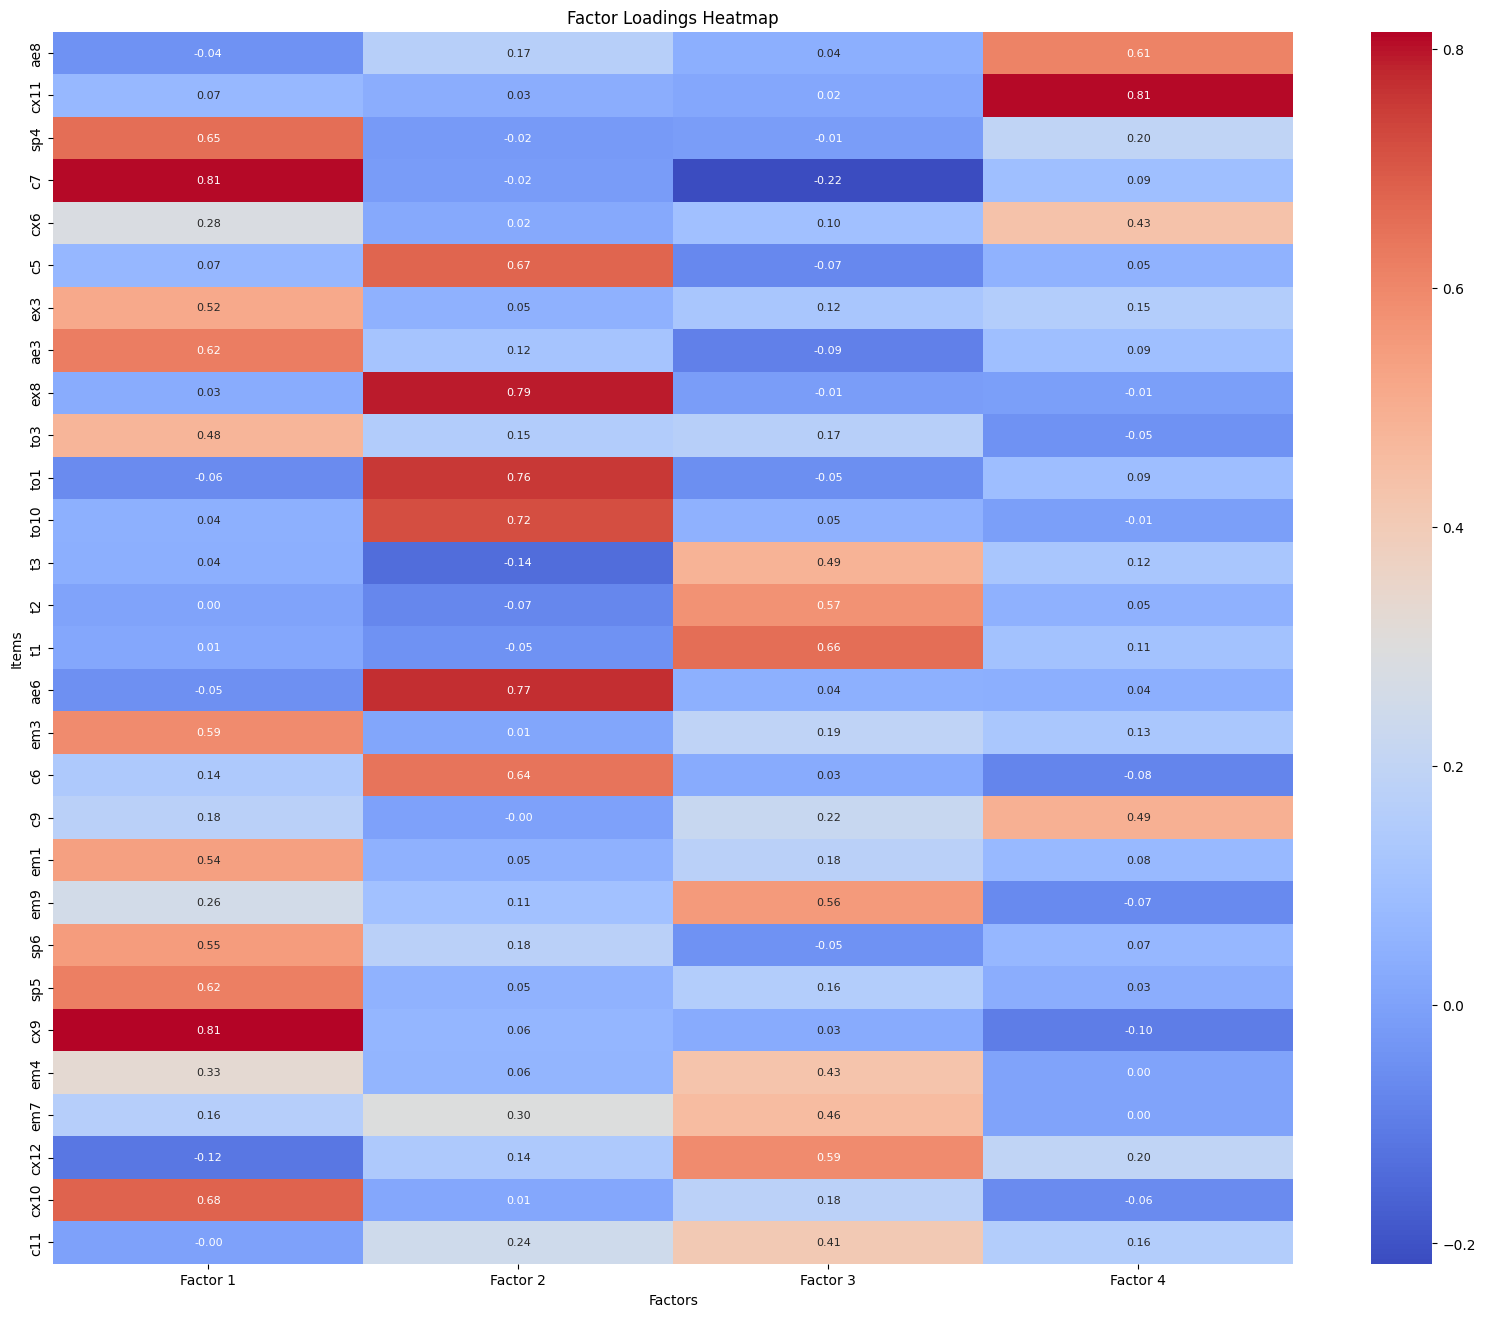

In [24]:
df_4_factor_v4 = df_4_factor_v3.drop(columns=low_loadings)

efa_4_factor_v4 = modeler.efa(df=df_4_factor_v4, n_factors=4)

vizer.plot_loadings_heatmap(
    loadings=efa_4_factor_v4.loadings_,
    item_names=df_4_factor_v4.columns,
    factor_names=[f"Factor {i+1}" for i in range(efa_4_factor_v4.n_factors)],
)

In [25]:
low_loadings = modeler.get_items_with_low_loadings(
    efa_4_factor_v4.loadings_, df_4_factor_v4.columns, threshold=0.4
)
low_loadings.sort()

print(low_loadings)

[]


In [26]:
df_strongest_loadings = modeler.strongest_loadings(
    efa_4_factor_v4.loadings_, df_4_factor_v4.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,cx9,1,0.81460,I feel a sense of belonging.
1,c7,1,0.81000,My life has purpose and meaning to me.
2,cx10,1,0.67818,I feel fully aligned with life.
3,sp4,1,0.65453,I feel a profound sense of belonging.
4,ae3,1,0.62235,I have the feeling of being cared for.
5,sp5,1,0.61906,I feel a profound sense of joy.
6,em3,1,0.58958,I experience a sense of aliveness.
7,sp6,1,0.55020,I feel unconditional love.
8,em1,1,0.53800,I experience a calm feeling in my heart.
9,ex3,1,0.51640,I feel like I am a part of something grand.
